In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib.pyplot import subplots
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

Load the data from the file 7.Py.1.csv into a DataFrame "df" and plot "y" vs "x" using the "plot" method of "df". What is the slope coefficient in a linear regression of y on x (to within 10%)?

In [2]:
df = pd.read_csv("7.Py.1.csv", encoding="utf-8")
print(df[:5])

            x         y
0  140.163772  1.067574
1  140.430310  0.604350
2  140.932133  0.539226
3  141.770519 -0.764813
4  140.004205  1.457074


<Axes: >

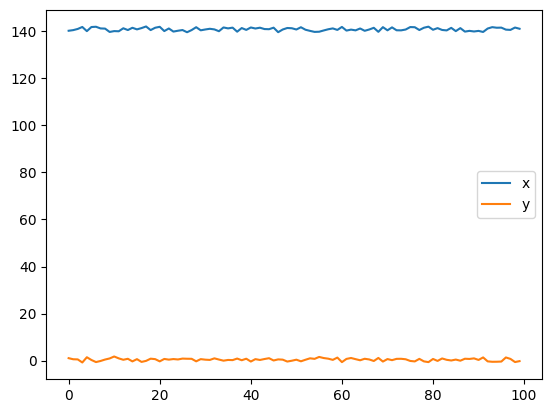

In [ ]:
df.plot()

In [30]:
X = MS(['x']).fit_transform(df)
y = df["y"]
model = sm.OLS(y, X)
results = model.fit()
print(summarize(results))

              coef  std err       t  P>|t|
intercept  95.4363    7.142  13.363    0.0
x          -0.6748    0.051 -13.303    0.0


In [36]:
# Gives wrong results!!
X_2 = MS([poly('x', degree=2)]).fit_transform(df)
model_2 = sm.OLS(y, X_2)
results_2 = model_2.fit()
print(summarize(results_2))

                        coef  std err       t  P>|t|
intercept             0.4238    0.032  13.282  0.000
poly(x, degree=2)[0] -4.4917    0.319 -14.077  0.000
poly(x, degree=2)[1] -1.1382    0.319  -3.567  0.001


In [39]:
# Correct results for a polynomial term
X_3 = pd.DataFrame({'intercept': np.ones(df.shape[0]),
                    'x': df['x'],
                    'x^2': df['x']**2})
model_3 = sm.OLS(y, X_3)
results_3 = model_3.fit()
print(summarize(results_3))

                coef   std err      t  P>|t|
intercept -5421.2467  1546.580 -3.505  0.001
x            77.7075    21.974  3.536  0.001
x^2          -0.2784     0.078 -3.567  0.001


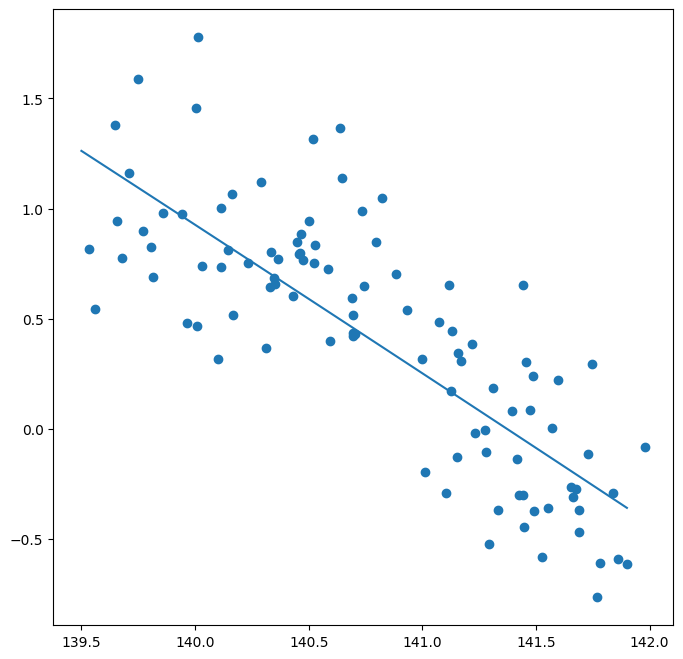

In [40]:
fig, ax = subplots(figsize=(8,8))

# scatter plot
ax.scatter(df["x"], df["y"])

# data for the fitted model
poly_x = np.arange(139.5, 142, 0.1)
poly_y = 47.9666 + -0.0024 * poly_x*poly_x
ax.plot(poly_x, poly_y)

Explanation

"Despite the fact that the overall slope is slightly negative, the linear term is very positive. Because the values of x are far from zero, a large linear term is needed to offset the quadratic term; otherwise the slope would be very negative in the range of the data. This is why we usually do not interpret the lower-order terms in a polynomial regression."
